# Supervised learning

## Regression model
#### Search regression of flat price (*objective*) based on total surface (*characteristic*)





In [ ]:
# Import required modules
import pandas as pd
%pylab inline
df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

print(df.columns)
print(df.head())
print(df.dtypes)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

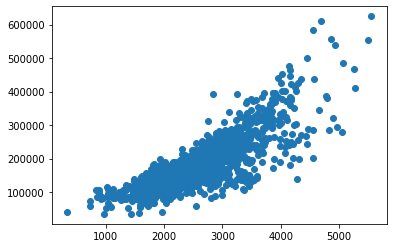

In [ ]:
# Data Preparation
X = df[['TotalSF']] # pandas DataFrame with characteristics, usually called X
y = df["SalePrice"] # pandas Series with objective (regression), usually called y

plt.scatter(X,y);

### Find relation using a **Linear Regression** model



In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# We calculate the model
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# This is the linear relationship between X and y
reg.coef_

array([83.79128706])

In [ ]:
# What would be the price of 3 houses with total surface 1000, 1500 and 4000 using our linear regression model?
reg.predict([[1000],[1500],[4000]])

array([ 50217.33439988,  92112.97793231, 301591.19559442])

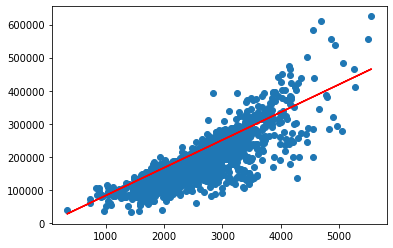

In [ ]:
# How does our linear regression fit in the real data?
y_pred = X['TotalSF'] * reg.coef_[0]
plt.scatter(X,y)
plt.plot(X,y_pred, c="red");

In [ ]:
np.corrcoef(X['TotalSF'],y)

array([[1.        , 0.82403696],
       [0.82403696, 1.        ]])

### How do I measure how good is our regression model?
#### Train-set and Test-set
###### We divice our data into 2 sets, one for training (*train-set*) and calculate the model and another for test (*test-set*) the model and compare how good is the model
###### Metrics: MAE, MAPE, RMSE


In [ ]:
from sklearn.model_selection import train_test_split
# X_train is the input to train the model
# y_train is the output for the X_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# We infer the linear regression model with Train-set (X_train and y_train)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# We calculate y using Test-set (X_test)
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
# We calculate the error using MAE between y_test and y_pred
mean_absolute_error(y_test, y_pred)

31020.859780038136

### Find relation using a **K-nearest neighbors** regression model
#### We approach objective using average of k-nearest neighbors' objectives
#### We use partitions to reduce the k-nearest neighbors to compare with
#### Params:
*   k: Number of neighbors
*   weight: Way to combine the label of the nearest point
-- Uniform: All the same
-- Distance: Weighted Average per distance
-- Custom: Weighted Average provided by user
* partition: Way to partition the training dataset (ball_tree, kd_tree, brute)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regk = KNeighborsRegressor(n_neighbors=5)
# We calculate the model
regk.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# What would be the price of 3 houses with total surface 1000, 1500 and 4000 using our k-nearest neighbors model?
regk.predict([[1000], [1500], [4000]])

array([ 86180. , 109100. , 292613.6])

### How do I measure how good is our regression model?
##### Train-set and Test-set
###### We divice our data into 2 sets, one for training and calculate the linear regression model and another for test the model and compare how good is the model

In [ ]:
# We infer the k-nearest neighbors model with Train-set (X_train and y_train)
regk.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# We calculate y using Test-set (X_test)
y_predk = regk.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
# We calculate the error using MAE between y_test and y_predk
mean_absolute_error(y_test, y_predk)
# Linear regression model was better

32103.24948453609

In [ ]:
from sklearn.metrics import mean_squared_error
# We calculate the error using RMSE between y_test and y_predk
np.sqrt(mean_squared_error(y_test, y_predk))

47188.575820499296

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))
# Linear regression model was better

44268.3899270325

The selection of model loss will depend on the business criteria



#### Cross Validation model
##### Apply a train-set and test-set rolling window approach
##### This is important if data is localized in certain blocks of X

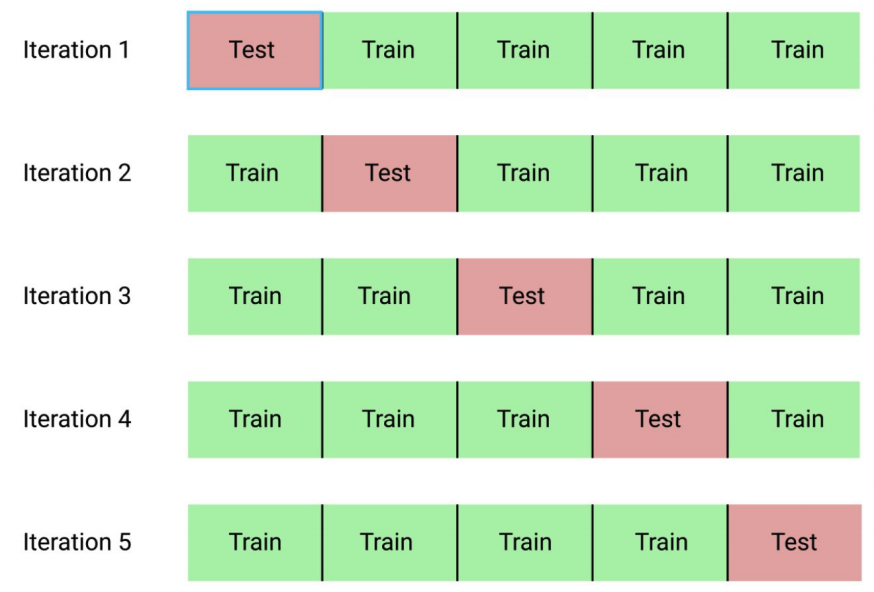


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg, X, y, cv=5, scoring="neg_mean_absolute_error")

array([-31590.33866136, -31060.2137948 , -30549.12490917, -29461.90971854,
       -32604.542219  ])

In [ ]:
cross_val_score(reg, X, y, cv=5, scoring="neg_mean_absolute_error").mean()

-31053.225860573915

In [ ]:
cross_val_score(regk, X, y, cv=5, scoring="neg_mean_absolute_error").mean()

-30366.48617869416

In [ ]:
# List of available scorers
import sklearn
list(sklearn.metrics.SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted']

#### Grid Search Cross Validation model
#### Permits to run cross validation with different parameters of the model and find the best based on *scoring* metric 

In [ ]:
from sklearn.model_selection import GridSearchCV
# GridSearchCV tests every combination of model params
# RandomizedSearchCV tests a subset of random combinations of model params
reg_gs = GridSearchCV(KNeighborsRegressor(),
                      param_grid={'n_neighbors': np.arange(3,50)},
                      scoring="neg_mean_absolute_error")
reg_gs.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
reg_gs.best_params_

{'n_neighbors': 44}

In [ ]:
# Lets try with n_neighbors = 44
regk = KNeighborsRegressor(n_neighbors=44)
# reg_gs = reg_gs.best_estimator_
cross_val_score(regk, X, y, cv=5, scoring="neg_mean_absolute_error").mean()
# With n_neighbors = 44 we have a better model that linear regression

-30279.436191815057

In [ ]:
# What would be the price of 3 houses with total surface 1000, 1500 and 4000 using our optimized k-nearest neighbors model?
regk.fit(X, y)
regk.predict([[1000],[1500],[4000]])

array([ 86693.43181818, 100573.79545455, 327734.06818182])

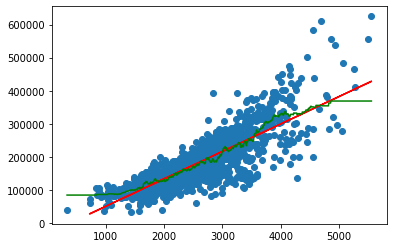

In [ ]:
# Let's compare how our models compare
plt.scatter(X, y)
plt.plot(X_test, y_pred, c="red")
synthetic_surfaces = np.linspace(X["TotalSF"].min(), X["TotalSF"].max(), 1000)
plt.plot(synthetic_surfaces, regk.predict(pd.DataFrame(synthetic_surfaces)), c="green");

#### Overfir and Underfit

In [ ]:
from tqdm import tqdm_notebook as tqdm
metrics = []
for k in tqdm(np.arange(10,200)):
    regkt = KNeighborsRegressor(n_neighbors=k)
    metrics.append(cross_val_score(regkt, X, y, cv=5, scoring="neg_mean_absolute_error").mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


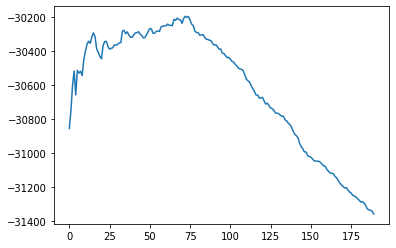

In [ ]:
# Left k values to max overfit the model while right k values underfit it
plt.plot(np.array(metrics))

In [ ]:
df = pd.DataFrame({'k': np.arange(10, 200), 'cross_val_score': np.array(metrics)})
df[df['cross_val_score'] == df['cross_val_score'].max()]

,k,cross_val_score
72,82,-30197.346752


### Underfitting vs Overfitting
* The *bias* is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (**underfitting**).
* The *variance* is error from sensitivity to small fluctuations in the training set. High variance can cause **overfitting**: modeling the random noise in the training data, rather than the intended outputs.

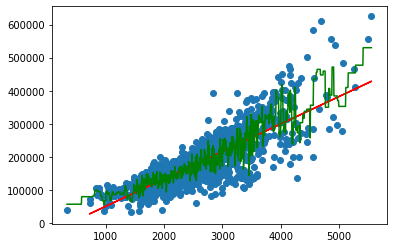

In [ ]:
# Overfit
regk = KNeighborsRegressor(n_neighbors=3)
regk.fit(X, y)
plt.scatter(X, y)
plt.plot(X_test, y_pred, c="red")
synthetic_surfaces = np.linspace(X["TotalSF"].min(), X["TotalSF"].max(), 1000)
plt.plot(synthetic_surfaces, regk.predict(pd.DataFrame(synthetic_surfaces)), c="green");

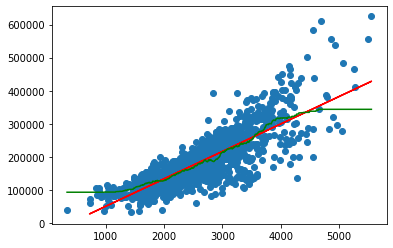

In [ ]:
# Underfit
regk = KNeighborsRegressor(n_neighbors=100)
regk.fit(X, y)
plt.scatter(X, y)
plt.plot(X_test, y_pred, c="red")
synthetic_surfaces = np.linspace(X["TotalSF"].min(), X["TotalSF"].max(), 1000)
plt.plot(synthetic_surfaces, regk.predict(pd.DataFrame(synthetic_surfaces)), c="green");

### Find relation using a **Decision Tree** model
#### Creates a model partitioning based on characteristics with similar objective
#### Params:
* max_depth: Number of Splits
* min_samples_leaf: Minimum number of observations per leaf

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regdt = DecisionTreeRegressor(max_depth=3)
# We calculate the model
regdt.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# What would be the price of 3 houses with total surface 1000, 1500 and 4000 using our decision tree model?
regdt.predict([[1000],[1500],[4000]])

array([ 97724.87022901,  97724.87022901, 316594.03738318])

In [ ]:
y_preddt = regdt.predict(X_test)

In [ ]:
# Let's optimize our model using GridSearchCV
reg_gs = GridSearchCV(DecisionTreeRegressor(),
                      param_grid={'max_depth': np.arange(2,10), 
                                  'min_samples_leaf': np.arange(10, 100, 5)},
                      scoring="neg_mean_absolute_error")
reg_gs.fit(X,y)
reg_gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 35}

In [ ]:
# Let's compare our model with linear regression and k-nearest neighbors
cross_val_score(reg_gs.best_estimator_, X, y, cv=5, scoring="neg_mean_absolute_error").mean()
# better than previous models

-30280.680304110505

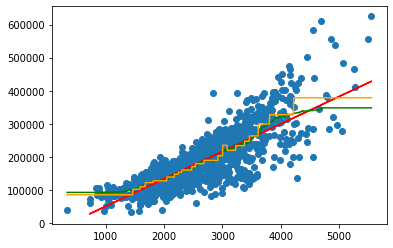

In [ ]:
regk = KNeighborsRegressor(n_neighbors=82)
regk.fit(X, y)
regdt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=35)
regdt.fit(X, y)
plt.scatter(X, y)
plt.plot(X_test, y_pred, c="red")
synthetic_surfaces = np.linspace(X["TotalSF"].min(), X["TotalSF"].max(), 1000)
plt.plot(synthetic_surfaces, regk.predict(pd.DataFrame(synthetic_surfaces)), c="green");
plt.plot(synthetic_surfaces, regdt.predict(pd.DataFrame(synthetic_surfaces)), c="orange");

### Additional Metric: Bias (sesgo)
#### Bias is the average of errors

In [ ]:
from sklearn.metrics import make_scorer
def bias(pred,y_test):
  return np.mean(pred-y_test)
cross_val_score(reg,X,y,cv=5,scoring=make_scorer(bias))

array([ 0.03500959,  0.00851475, -0.01168433,  0.00403321, -0.0375241 ])

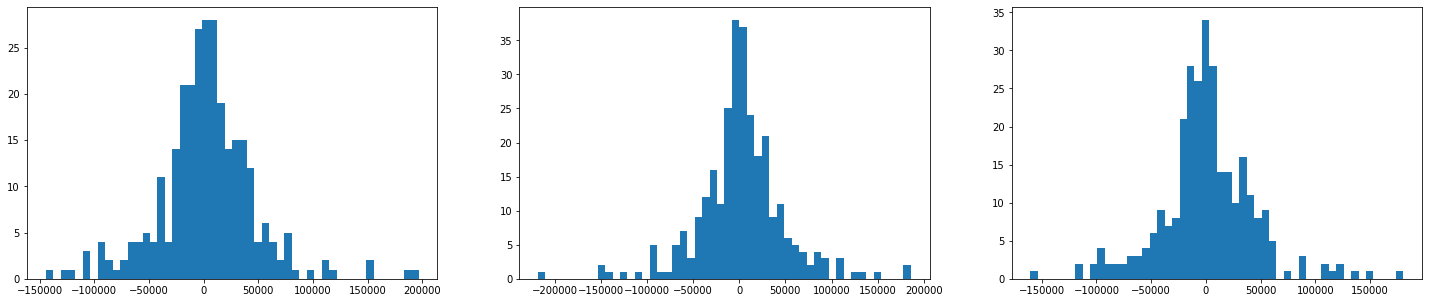

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25,5)
axs[0].hist(y_test - y_pred, bins=50)
axs[1].hist(y_test - y_predk, bins=50)
axs[2].hist(y_test - y_preddt, bins=50);

## Classification model
#### Search clasification of car speed (*objective*) based on road grade and bumpiness (*characteriestics*)


In [ ]:
%pylab inline
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/terrain.csv")
X = df[["bumpiness","grade"]].values
y = df["target"]

def draw(clf,X,y,h=0.05):
    plt.figure(figsize=(10,10))
    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


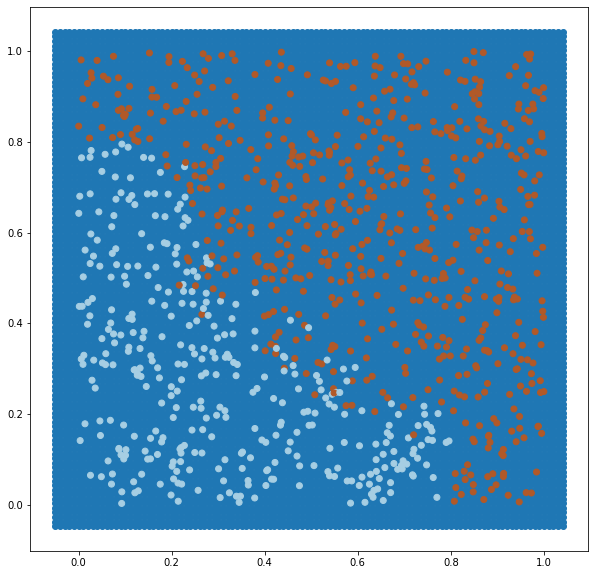

In [ ]:
draw(None, X, y, 0.01)

### Find relation using a **Logistic Regression** model
#### LogisticRegression is a classifier (objective is a tag)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# We calculate the model
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

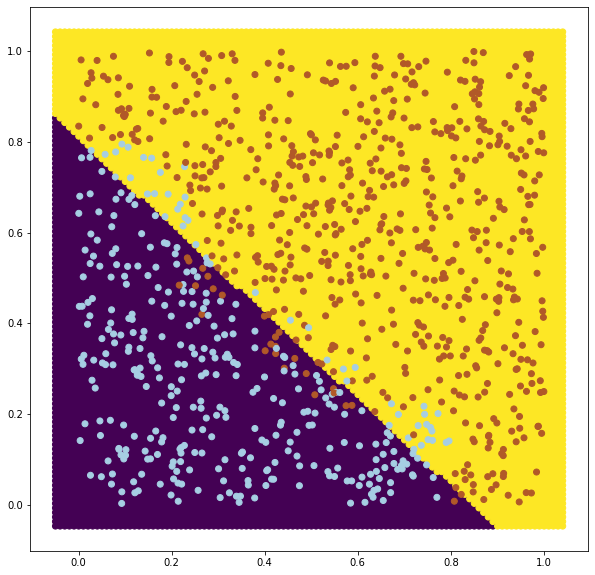

In [ ]:
draw(clf, X, y, 0.01)

### How to know the probability of each objetive?

In [ ]:
# What probaility to result each tag for bumpiness 0.6 and grade 0.23
clf.predict_proba([[0.6, 0.23]])

array([[0.5098992, 0.4901008]])

### How do I measure how good is our classification model?
### Train-set and Test-set
#### We divice our data into 2 sets, one for training (train-set) and calculate the model and another for test (test-set) the model and compare how good is the model
#### Metric: accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, scoring="accuracy").mean()

0.9289999999999999

### Find relation using a **K-nearest neighbors** classification model
#### We approach objective using voting of k-nearest neighbors' objectives
#### We use partitions to reduce the k-nearest neighbors to compare with

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
# GridSearchCV tests every combination of model params
# RandomizedSearchCV tests a subset of random combinations of model params
clf_gs = GridSearchCV(KNeighborsClassifier(),
                      param_grid={'n_neighbors': np.arange(3,50)},
                      scoring="accuracy")
clf_gs.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:

clf_gs.best_estimator_.predict_proba([[0.6,0.23]])

array([[0.4375, 0.5625]])

In [ ]:
clf_gs.best_params_

{'n_neighbors': 16}

In [ ]:
clf_gs.best_score_
# Better than Logistic Regression model in terms of accuracy

0.9570000000000001

In [ ]:
clk = clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [ ]:
clk.predict([[0.5, 0.7]])

array([1.])

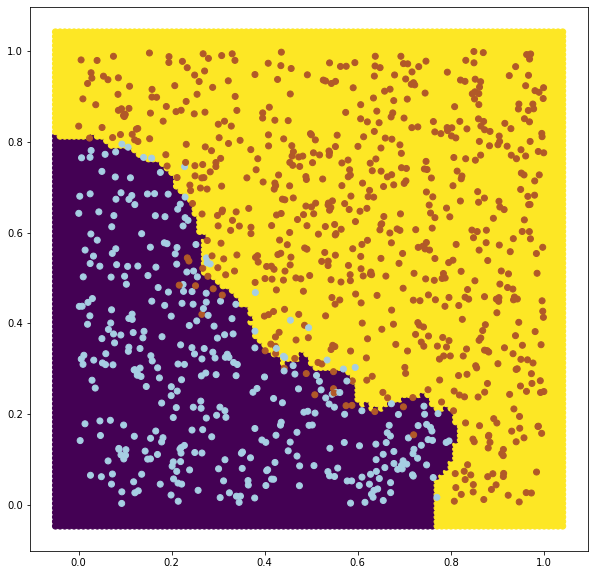

In [ ]:
draw(clk, X, y, 0.01)

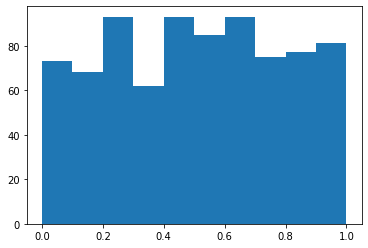

In [ ]:
# We observe an strange behaviour of the model for the highest values of bumpiness or lowest values of grade
# Let's examine if our train-set data covers all characteristic values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
plt.hist(X_train[:,0]);
# We can see we have enough examples for one of the bumpiness characteristic

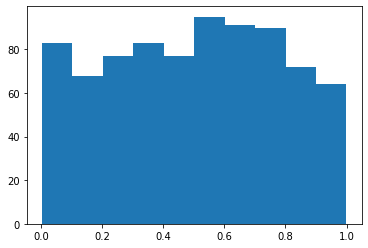

In [ ]:
plt.hist(X_train[:,1]);
# We can see we have enough examples for one of the grade characteristic

# Confusion Matrix (Precision and Recall)

#### These metrics apply by class

*   Higher Precision > Lower False Positive
*   Higher Recall > Lower False Negative

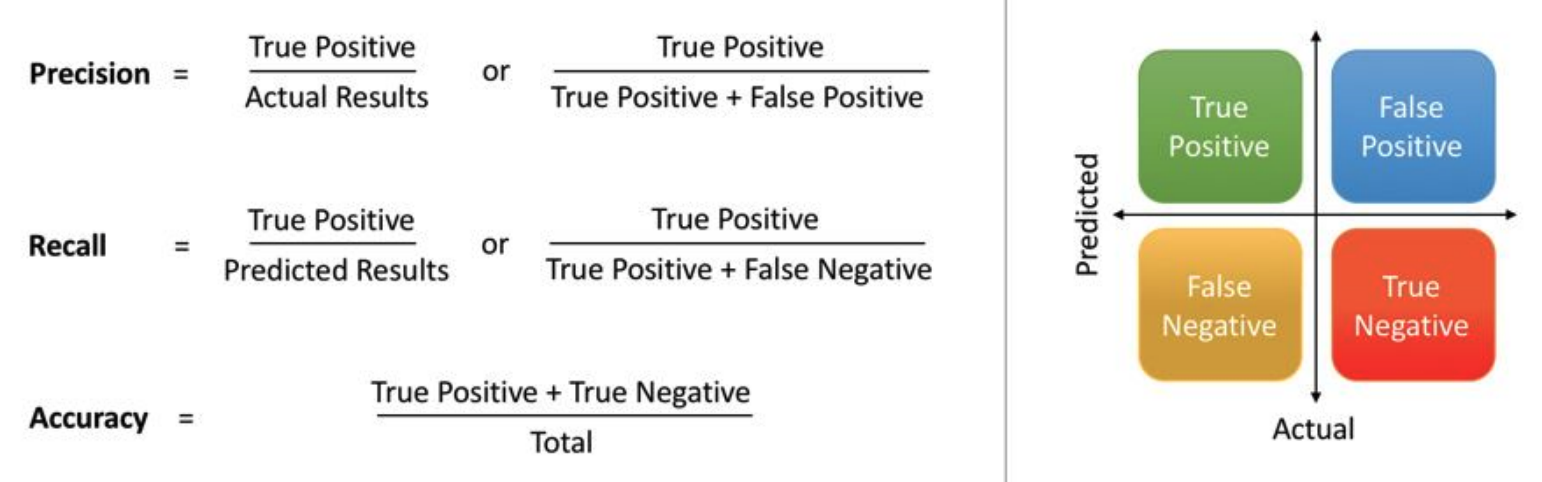



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, clk.predict(X_test))

array([[ 70,   4],
       [  3, 123]])

In [ ]:
print(classification_report(y_test, clk.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        74
         1.0       0.97      0.98      0.97       126

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
cross_val_score(clk, X, y, scoring="precision").mean()
# Returns the mean of precision for the different classes

0.9720335220335221

In [ ]:
cross_val_score(clk, X, y, scoring="recall").mean()
# Returns the mean of recall for the different classes

0.9613834227787716

### Find relation using a **Support Vector Machine** model
#### We approach objective using a separation plane based on distance of boundary ocurrennces to the plan
### Params:
* C: Sum of Error Margins
* kernel:
-- linear: line of separation
-- rbf: circle of separation. Additional param gamma: Inverse of the radius
-- poly: curved line of separation. Additional param degree: Degree of the polynome


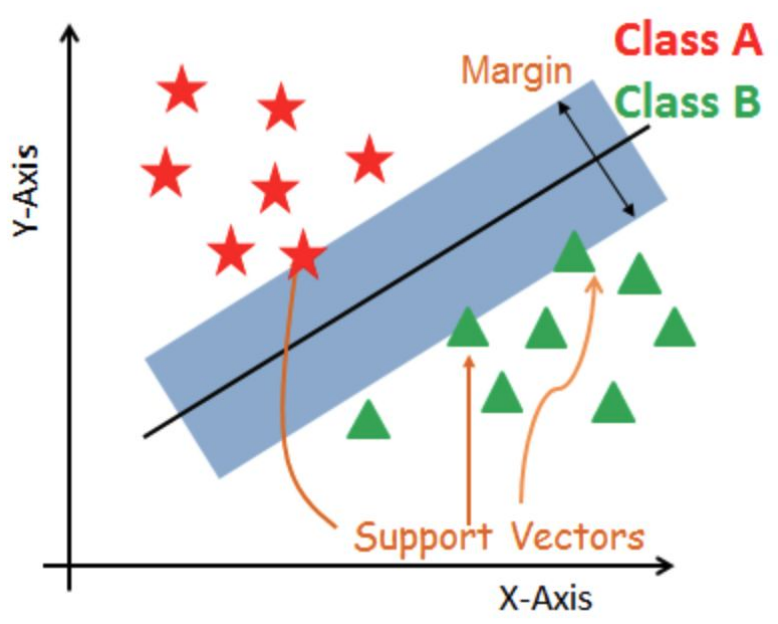

In [ ]:
from sklearn.svm import SVC
clf_gs = GridSearchCV(SVC(kernel='linear'),
                      param_grid={'C': [.1,1,10,100]},
                      scoring="accuracy")
clf_gs.fit(X,y)
clf_gs.best_params_

{'C': 100}

In [ ]:
clf_gs.best_score_

0.929

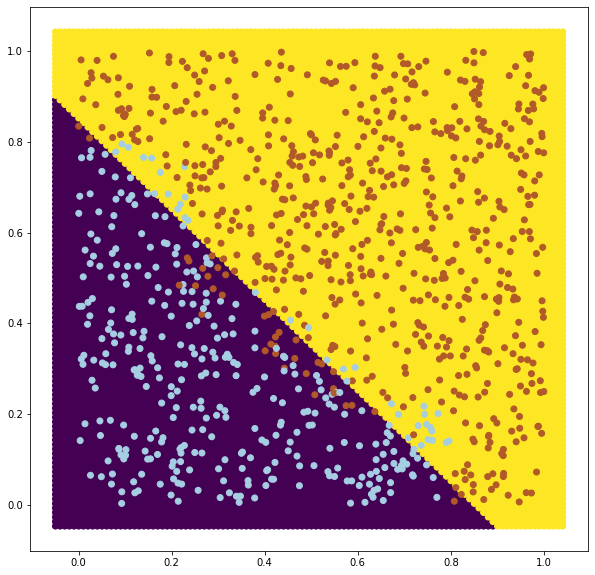

In [ ]:
draw(clf_gs.best_estimator_, X, y, 0.01)

In [ ]:
clf_gs = GridSearchCV(SVC(),
                      param_grid={'kernel': ['rbf'], 
                                  'C': [.1, 1, 10, 100],
                                  'gamma': [1, 10, 100]},
                      scoring="accuracy")
clf_gs.fit(X,y)
clf_gs.best_params_

{'C': 100, 'gamma': 10, 'kernel': 'rbf'}

In [ ]:
clf_gs.best_score_

0.958

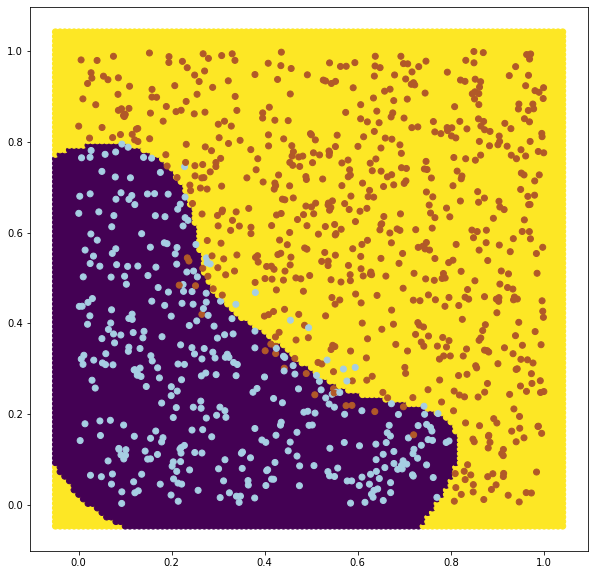

In [ ]:
draw(clf_gs.best_estimator_, X, y, 0.01)

In [ ]:
clf_gs = GridSearchCV(SVC(kernel='poly'),
                      param_grid={'C': [.1, 1, 10, 100, 1000],
                                  'degree': [2,3,4]},
                      scoring="accuracy")
clf_gs.fit(X,y)
clf_gs.best_params_

{'C': 1000, 'degree': 4}

In [ ]:
clf_gs.best_score_

0.9530000000000001

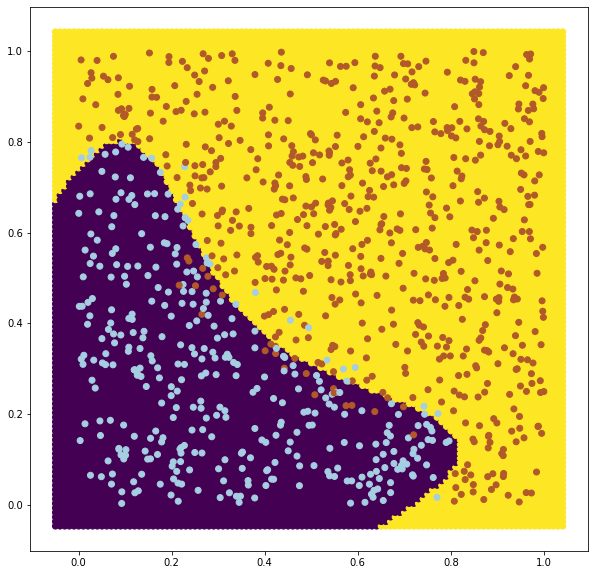

In [ ]:
draw(clf_gs.best_estimator_, X, y, 0.01)

### Find relation using a **Decision Tree** clasification model
### Params:
* max_depth: Number of Splits
* min_samples_leaf: Minimum number of observations per leaf

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gs = GridSearchCV(DecisionTreeClassifier(),
                      param_grid={'max_depth': np.arange(3,10),
                                  'min_samples_leaf': np.arange(10, 50, 5)},
                      scoring="accuracy")
clf_gs.fit(X,y)
clf_gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 25}

In [ ]:
clf_gs.best_score_

0.9419999999999998

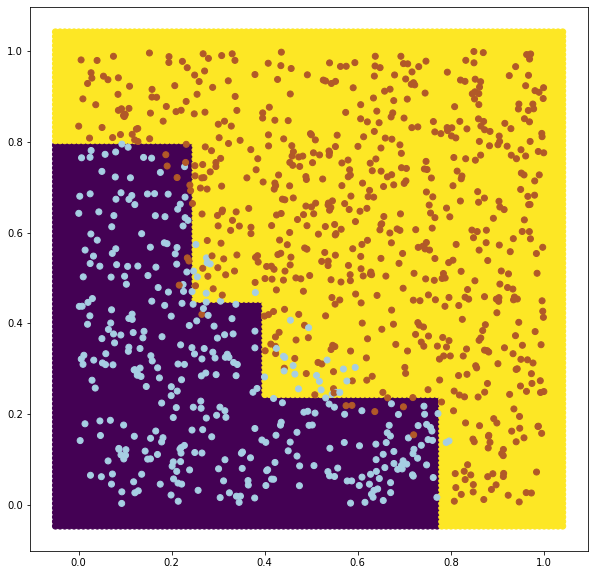

In [ ]:
draw(clf_gs.best_estimator_, X, y, 0.01)

In [ ]:
# Let's see what happen in the boundaries
clf_gs.best_estimator_.predict_proba([[0.6, 0.23]])

array([[0.83870968, 0.16129032]])

### Additional Metrics: ROC Curve
#### The ROC Curve shows how confident your classifier is, with the area under this curve.
#### AUC is the area of the Roc Curve (Best = 1)

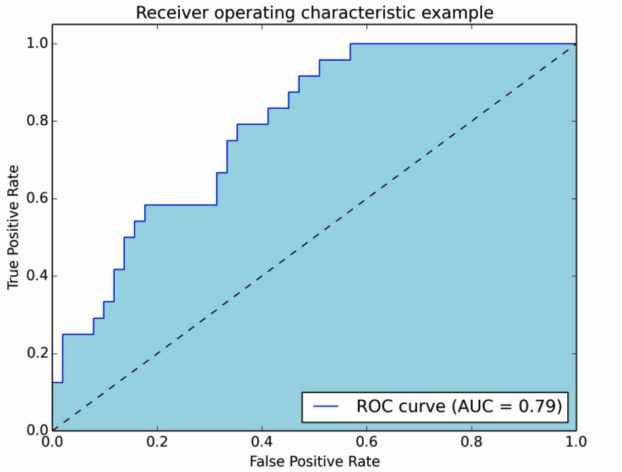

AUC DecisionTreeClassifier: 0.9923316173316175
AUC Logistic Regression: 0.9841269841269842


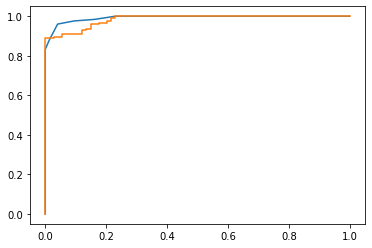

In [ ]:
from sklearn.metrics import roc_curve, auc
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clf_gs.best_estimator_.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)
print(f"AUC DecisionTreeClassifier: {auc(fp,tp)}")
fp,tp,_ = roc_curve(y_test,clf.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)
print(f"AUC Logistic Regression: {auc(fp,tp)}")

## Ensemble
### The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
#### Types:
* Stack
* Voting
* Bagging
* Random Forest (recommended)


### RandomForest (clasification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_gs = GridSearchCV(RandomForestClassifier(),
                      param_grid={'max_depth': np.arange(3,10),
                                  'min_samples_leaf': np.arange(10, 50, 5)},
                      scoring="accuracy")
clf_gs.fit(X,y)
clf_gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

In [ ]:
clf_gs.best_score_

0.954

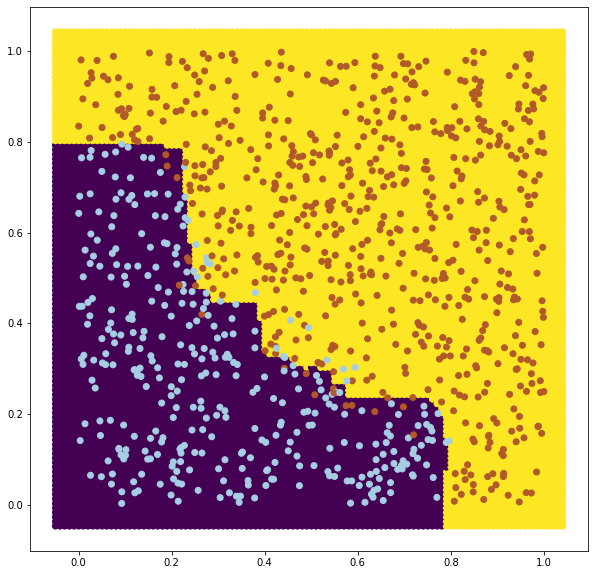

In [ ]:
draw(clf_gs.best_estimator_, X, y, 0.01)

### GradientBoots (regression)
#### GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.



In [ ]:
# Import required modules
import pandas as pd
%pylab inline
df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]
# Data Preparation
X = df[['TotalSF']] # pandas DataFrame with characteristics, usually called X
y = df["SalePrice"] # pandas Series with objective (regression), usually called y

Populating the interactive namespace from numpy and matplotlib


In [ ]:
regdt1 = DecisionTreeRegressor(max_depth=5)
regdt1.fit(X, y)
pred1 = regdt.predict(X)
restable = X.copy()
restable["y_real"] = y
restable["pred1"] = pred1
restable["res1"] = restable["y_real"] - restable["pred1"]
restable.head()

,TotalSF,y_real,pred1,res1
0,2566,208500,8472.933967,200027.066033
1,2524,181500,8472.933967,173027.066033
2,2706,223500,8472.933967,215027.066033
3,2473,140000,8472.933967,131527.066033
4,3343,250000,8472.933967,241527.066033


In [ ]:
# We iterate with a learning rate that correct the previous prediction for the next learning iteration
for i in range(1,10):
  regdt = DecisionTreeRegressor(max_depth=5)
  regdt.fit(X, restable[f"res{i}"])
  pred = regdt.predict(X)
  restable[f"pred{i+1}"] = restable[f"pred{i}"] + 0.3 * pred
  restable[f"res{i+1}"] = restable["y_real"] - restable[f"pred{i+1}"]
restable.head()


,TotalSF,y_real,pred1,res1,pred2,res2,pred3,res3,pred4,res4,pred5,res5,pred6,res6,pred7,res7,pred8,res8,pred9,res9,pred10,res10
0,2566,208500,8472.933967,200027.066033,60653.957901,147846.042099,94990.309391,113509.690609,121008.793607,87491.206393,137885.347667,70614.652333,150512.175736,57987.824264,158455.463507,50044.536493,164837.141622,43662.858378,169403.681656,39096.318344,171959.484386,36540.515614
1,2524,181500,8472.933967,173027.066033,56216.088560,125283.911440,90552.440050,90947.559950,114317.313014,67182.686986,131193.867074,50306.132926,142030.579004,39469.420996,149973.866775,31526.133225,156355.544891,25144.455109,160922.084925,20577.915075,163477.887654,18022.112346
2,2706,223500,8472.933967,215027.066033,63715.274304,159784.725696,101820.850746,121679.149254,127839.334962,95660.665038,146605.328624,76894.671376,159232.156693,64267.843307,168496.853819,55003.146181,174878.531935,48621.468065,179445.071968,44054.928032,189438.693235,34061.306765
3,2473,140000,8472.933967,131527.066033,50733.161777,89266.838223,80315.321244,59684.678756,104080.194208,35919.805792,120956.748268,19043.251732,131793.460199,8206.539801,139736.747969,263.252031,146118.426085,-6118.426085,150684.966119,-10684.966119,153240.768848,-13240.768848
4,3343,250000,8472.933967,241527.066033,78777.670758,171222.329242,124649.062078,125350.937922,157398.607484,92601.392516,181045.921676,68954.078324,196633.248614,53366.751386,208743.349540,41256.650460,217891.522222,32108.477778,224671.935513,25328.064487,228262.981433,21737.018567


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg_gs = GridSearchCV(GradientBoostingRegressor(learning_rate=0.1),
                      param_grid={'max_depth': np.arange(3,10),
                                  'min_samples_leaf': np.arange(10, 50, 5)},
                      scoring="neg_mean_absolute_error")
reg_gs.fit(X, y)
reg_gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 35}

In [ ]:
reg_gs.best_score_
# Best than previous models

-29979.368737733203

## Pipeline
#### The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline from Pipeline
pipe = Pipeline(steps=[("scaled", RobustScaler()),
                       ("rf", RandomForestClassifier)])
pipe.fit(X, y)